
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400102114'
first_name = 'Matin'
last_name = 'Mirzababaei'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [13]:
# TODO: Write your code here

# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE

import random

# Set random seed for reproducibility
np.random.seed(42)

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [16]:
# TODO: Write your code here

# Spotify dataset
spotify_df = pd.read_csv('spotify.csv')
spotify_df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [17]:
# Selecting relevant features for clustering

# relevant features are numerical ones like 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'

selected_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

spotify_features = spotify_df[selected_features]

spotify_features.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

Standardization is crucial in clustering because it ensures that each feature contributes equally to the distance computations, preventing features with larger scales from dominating the clustering process. Without standardization, clustering results might be biased toward features with higher magnitudes.


- Importance of Using a Standard Scaler

**1) Equal Contribution of Features**

**2) Improved Algorithm Performance**


- Potential Complications Without Scaling

**1) Biased Clustering**

**2) Inefficient Convergence**

In [18]:
# TODO: Write your code here

# Implementing a standard scaler function from scratch
def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

standardized_features = standard_scaler(spotify_features)

standardized_features[:5]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927
1,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198
2,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227
3,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953
4,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

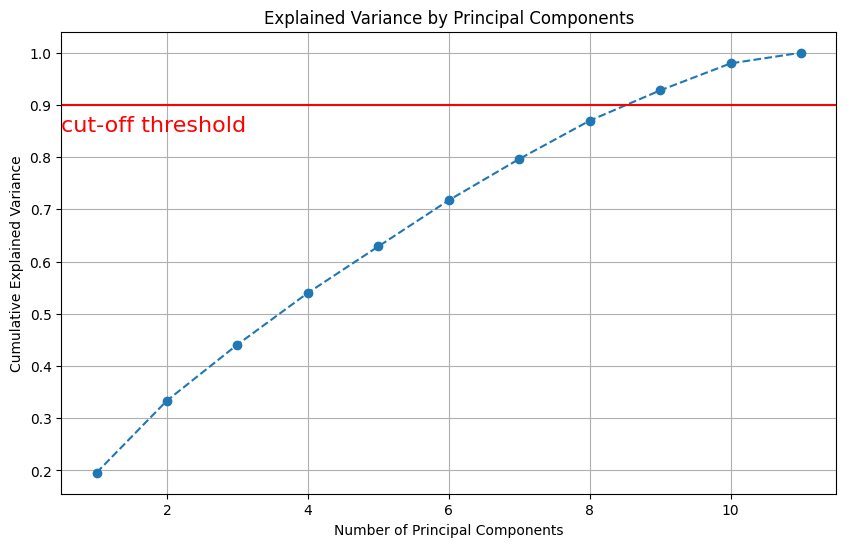

In [22]:
# TODO: Write your code here

pca = PCA()
pca.fit(standardized_features)

# Calculating the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, 'cut-off threshold', color='red', fontsize=16)
plt.grid()
plt.show()

num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(standardized_features)


# Clustering

Implement K-means for clustering from scratch.

In [23]:
# TODO: Write your code here

# Implementing K-means clustering from scratch
def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    
    # Initializing centroids randomly
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iters):

        clusters = np.array([np.argmin([np.linalg.norm(x - centroid) for centroid in centroids]) for x in X])
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        
        # convergence check
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids



Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

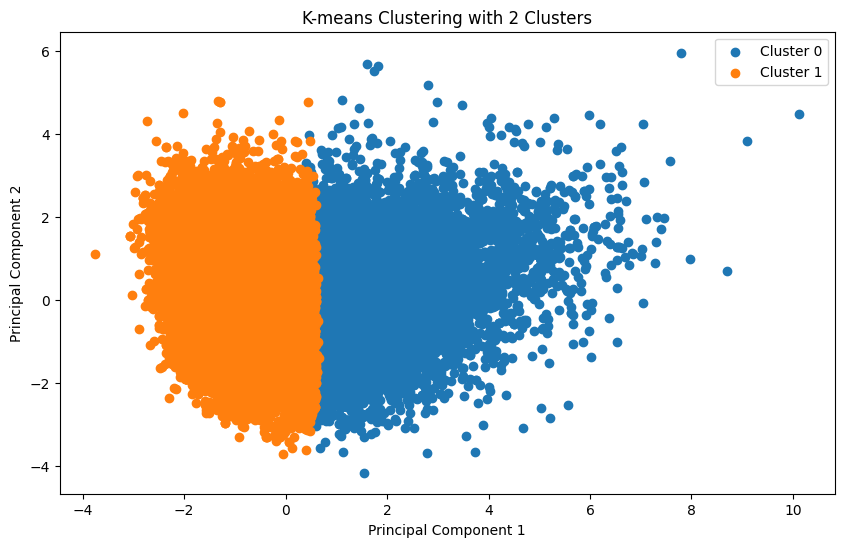

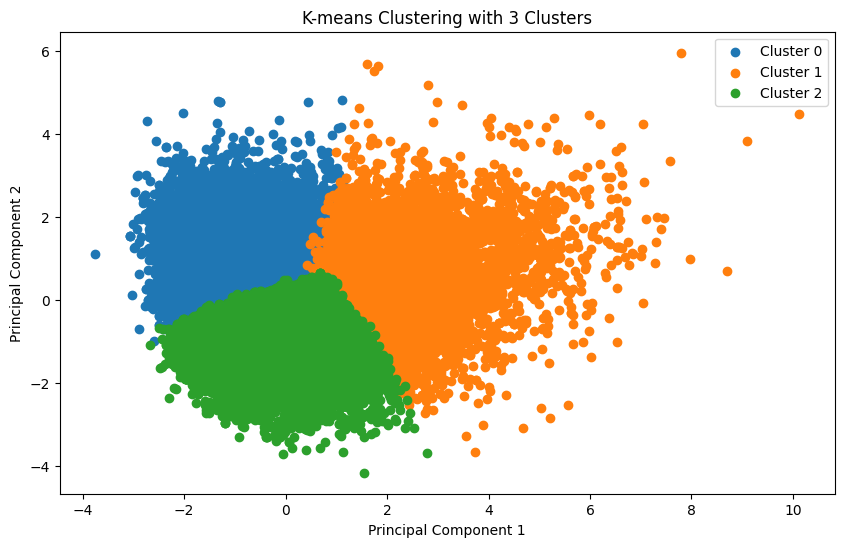

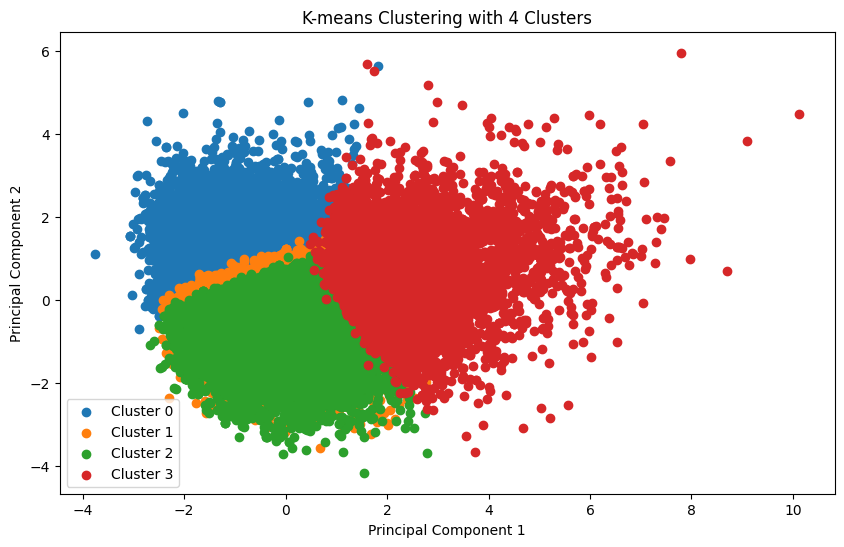

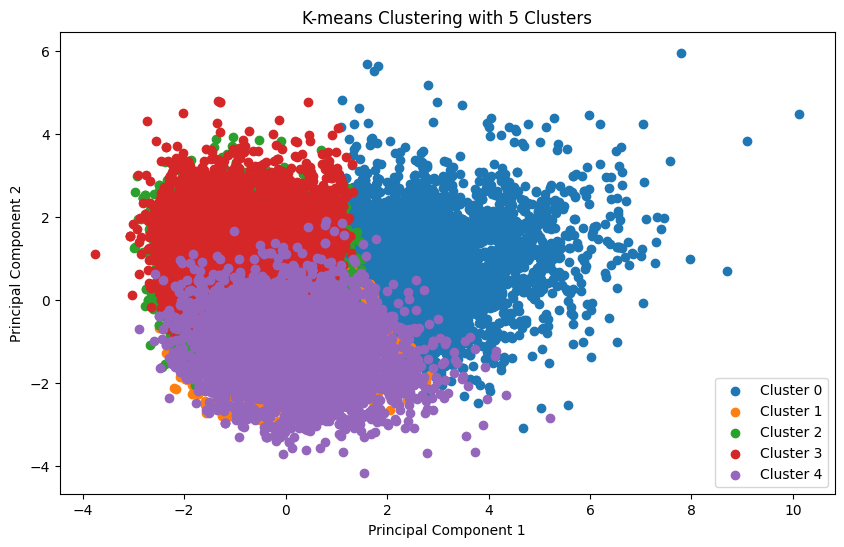

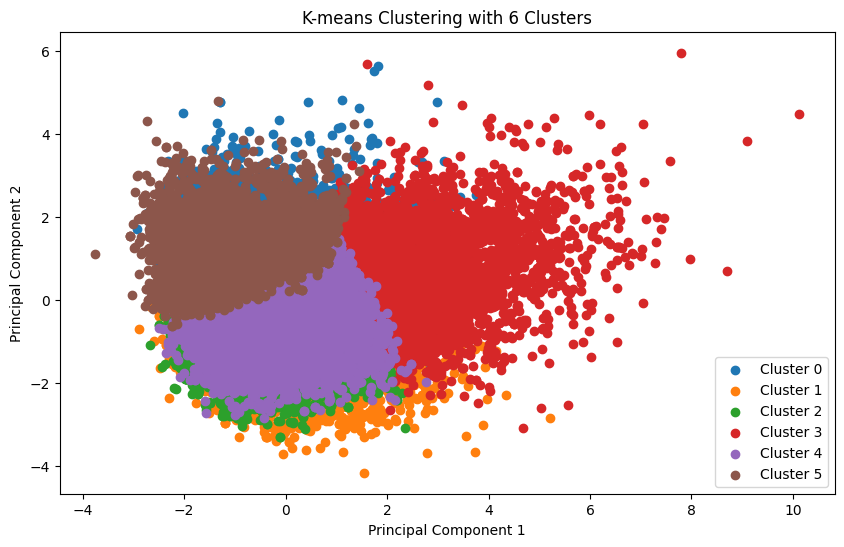

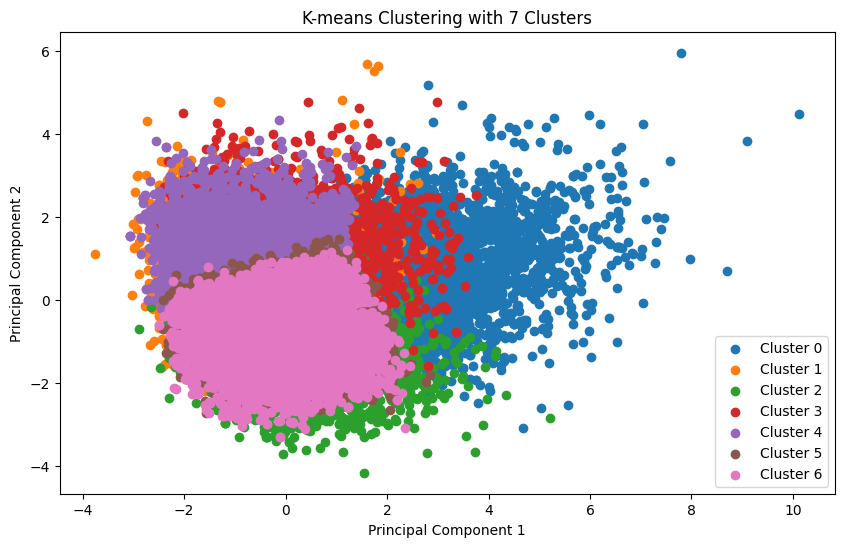

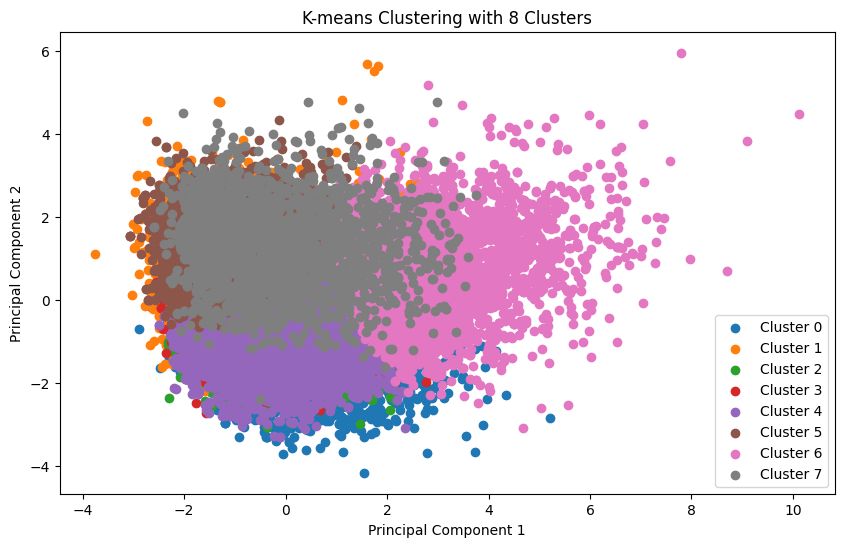

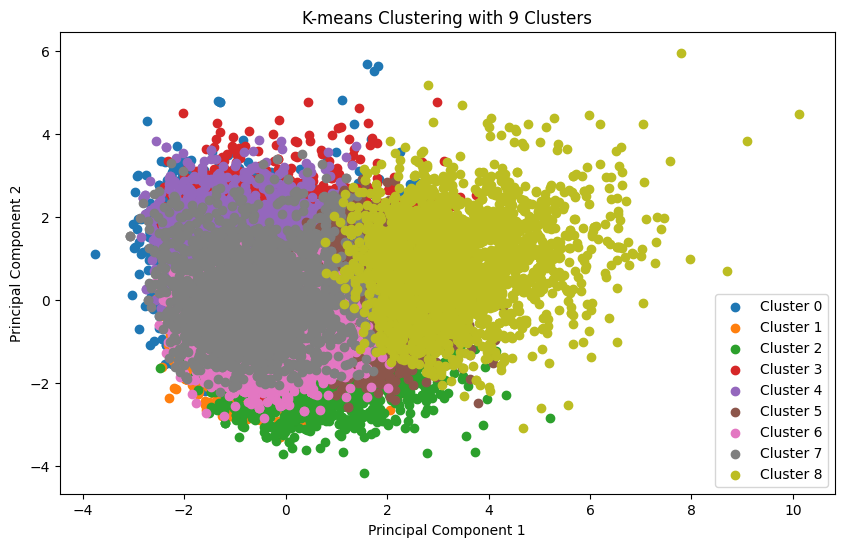

In [24]:
# TODO: Write your code here

# Extracting the first two principal components
pca_2d = PCA(n_components=2)
reduced_features_2d = pca_2d.fit_transform(standardized_features)

# Plotting clusters (2 to 9)
for n_clusters in range(2, 10):
    clusters, centroids = kmeans(reduced_features, n_clusters)
    
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        cluster_data = reduced_features_2d[clusters == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
    
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

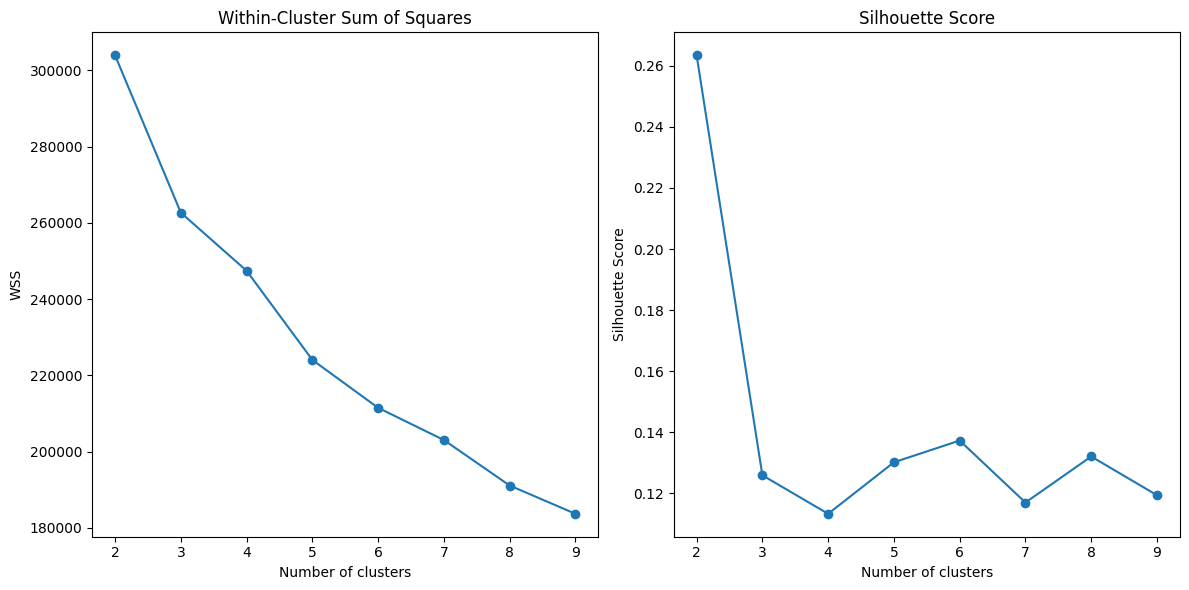

In [9]:
# TODO: Write your code here

# Function to compute silhouette score on a subsample
def compute_silhouette_score(data, clusters, sample_size=1000):
    if data.shape[0] > sample_size:
        random_indices = np.random.choice(data.shape[0], sample_size, replace=False)
        data_sample = data[random_indices]
        clusters_sample = clusters[random_indices]
    else:
        data_sample = data
        clusters_sample = clusters
    return silhouette_score(data_sample, clusters_sample)

# Running K-means for 2 to 9 clusters with subsampling for silhouette score
range_n_clusters = range(2, 10)
wss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusters, centroids = kmeans(reduced_features, n_clusters)
    wss.append(np.sum([np.linalg.norm(reduced_features[clusters == j] - centroids[j])**2 for j in range(n_clusters)]))
    silhouette_scores.append(compute_silhouette_score(reduced_features, clusters))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wss, marker='o')
plt.title('Within-Cluster Sum of Squares')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## Note:

Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.

Unfortunately, there is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.

These methods include direct methods and statistical testing methods:

Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.
Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic.

## Elbow method

Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The optimal number of clusters can be defined as follow:

1) Plot the curve of wss according to the number of clusters k.

2) The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

According to this approach the optimal number of clusters will be 3.


## Average silhouette method

 Briefly, it measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

 Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

 The algorithm is similar to the elbow method and can be computed as follow:

1) Plot the curve of avg.sil according to the number of clusters k.

2) The location of the maximum is considered as the appropriate number of clusters.

According to this approach the optimal number of clusters will be 2.


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [10]:
# # TODO: Write your code here

# Randomly selecting two songs from each cluster and computing their distance
def sample_check(clusters, data, reduced_features, num_samples=2):
    for cluster in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster)[0]
        if len(cluster_indices) >= num_samples:
            sample_indices = np.random.choice(cluster_indices, num_samples, replace=False)
            samples = data[sample_indices]
            sample_features = reduced_features[sample_indices]
            distance = np.linalg.norm(sample_features[0] - sample_features[1])
            print(f"Cluster {cluster}:")
            print(samples)
            print(f"Distance between the two samples: {distance}\n")

clusters, _ = kmeans(reduced_features, 3)  # Assuming 3 clusters for this example
sample_check(clusters, spotify_df[['track_name']].values, reduced_features)

Cluster 0:
[['Born To Be Wild']
 ['The Story Never Ends']]
Distance between the two samples: 4.916326002793392

Cluster 1:
[['Pensando en Ti']
 ['Carry On (from the Original Motion Picture "POKÉMON Detective Pikachu")']]
Distance between the two samples: 3.629086332052582

Cluster 2:
[['64 Ways']
 ['Strongest (Alan Walker Remix)']]
Distance between the two samples: 4.846033013392575



Since songs in a cluster are close enough, clustering has been done properly.

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

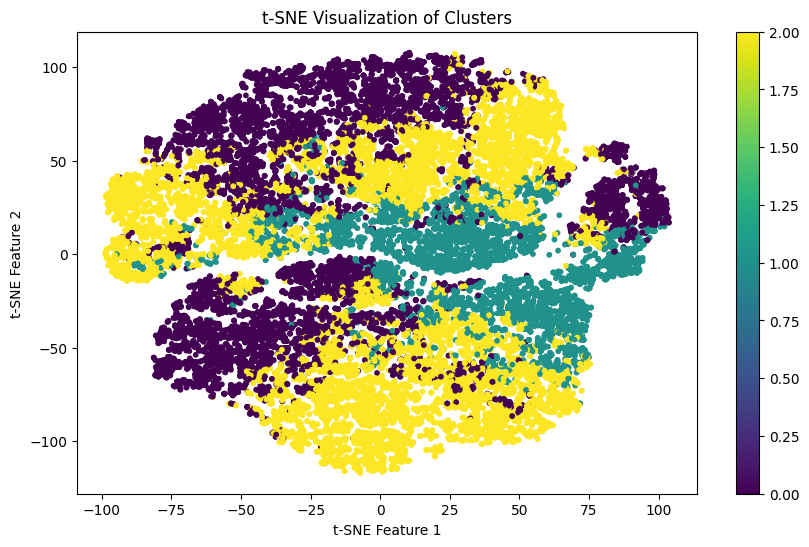

In [15]:
# Running K-means for 3 clusters as an example
clusters, _ = kmeans(reduced_features, 3)

# Reducing to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)


plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()

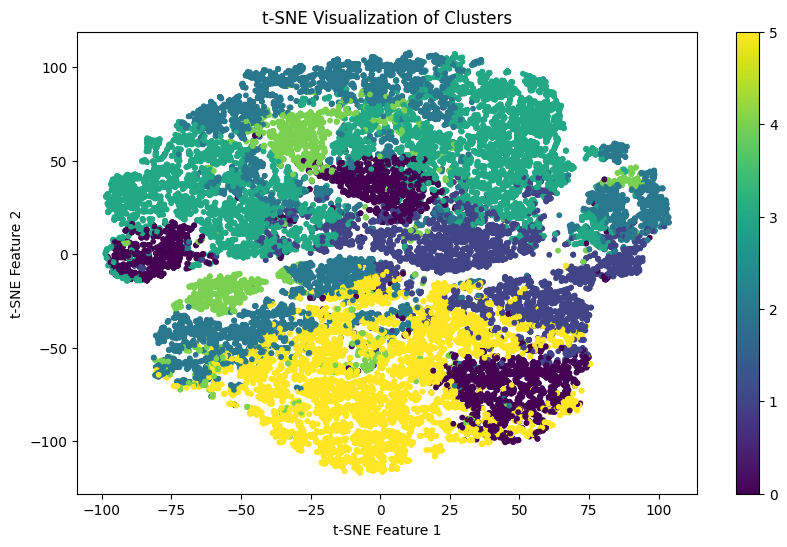

In [25]:
# Running K-means for 6 clusters as an example
clusters, _ = kmeans(reduced_features, 6)

# Reducing to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(reduced_features)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()